<a href="https://colab.research.google.com/github/amanjain-iitb/Stock_Prediction/blob/main/Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/stock_data/Nifty(1.04.19-30.05.21).csv')

In [ ]:
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [ ]:
df

,Date,Open,High,Low,Close,Volume
2019-04-01,01-Apr-19,11665.20,11738.10,11644.75,11669.15,379572660
2019-04-02,02-Apr-19,11711.55,11729.35,11655.85,11713.20,386131413
2019-04-03,03-Apr-19,11735.30,11761.00,11629.15,11643.95,365760070
2019-04-04,04-Apr-19,11660.20,11662.55,11559.20,11598.00,349029830
2019-04-05,05-Apr-19,11638.40,11689.65,11609.50,11665.95,266665797
...,...,...,...,...,...,...
2021-06-24,24-Jun-21,15737.30,15821.40,15702.70,15790.45,316662241
2021-06-25,25-Jun-21,15839.35,15870.80,15772.30,15860.35,314614380
2021-06-28,28-Jun-21,15915.35,15915.65,15792.15,15814.70,255099272
2021-06-29,29-Jun-21,15807.50,15835.90,15724.05,15748.45,360334724


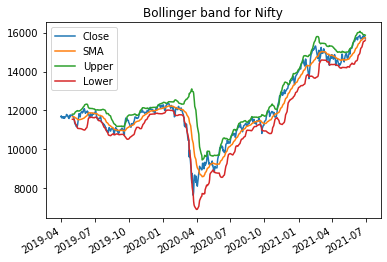

In [ ]:
period=20
df['SMA']=df['Close'].rolling(window=period).mean() #SMA
df['STD']=df['Close'].rolling(window=period).std() #Standard Dev
df['Upper']=df['SMA']+(2*df['STD'])
df['Lower']=df['SMA']-(2*df['STD'])
df[['Close','SMA','Upper','Lower']].plot()
plt.title('Bollinger band for Nifty')
plt.show()

In [ ]:
new_df=df[period-1:]

In [ ]:
def get_signal(data):
  buy_signal=[]
  sell_signal=[]
  for i in range(len(data['Close'])):
    if data['Close'][i]>data['Upper'][i]:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i]<data['Lower'][i]:
      sell_signal.append(np.nan)
      buy_signal.append(data['Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal,sell_signal)


In [ ]:
new_df['Buy']=get_signal(new_df)[0]
new_df['Sell']=get_signal(new_df)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


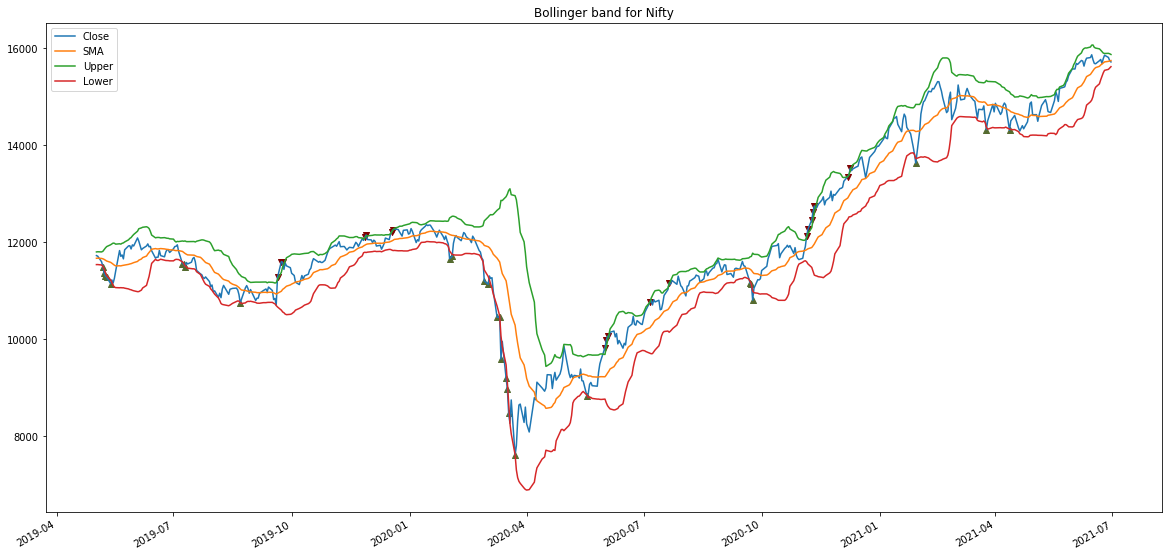

In [ ]:
new_df[['Close','SMA','Upper','Lower']].plot(figsize=(20,10))
plt.scatter(new_df.index,new_df[['Buy']],color='darkolivegreen' ,marker='^',alpha=1)
plt.scatter(new_df.index,new_df[['Sell']],color='maroon',marker='v',alpha=1)
plt.title('Bollinger band for Nifty')
plt.show()